# Importing Libraries and Dataset

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.api.types import CategoricalDtype
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('addiction_population_data.csv')

# Exploratory Data Analysis

In [123]:
df.head()

,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,NaN,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,4,Michael Mathews,35,Other,Togo,North Cory,University,Unemployed,16023,In a relationship,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3000 non-null   int64  
 1   name                       3000 non-null   object 
 2   age                        3000 non-null   int64  
 3   gender                     3000 non-null   object 
 4   country                    3000 non-null   object 
 5   city                       3000 non-null   object 
 6   education_level            2580 non-null   object 
 7   employment_status          3000 non-null   object 
 8   annual_income_usd          3000 non-null   int64  
 9   marital_status             3000 non-null   object 
 10  children_count             3000 non-null   int64  
 11  smokes_per_day             3000 non-null   int64  
 12  drinks_per_week            3000 non-null   int64  
 13  age_started_smoking        3000 non-null   int64

In [125]:
df.shape

(3000, 25)

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3000.0,1500.500000,866.169729,1.0,750.750,1500.5,2250.25,3000.0
age,3000.0,46.654333,18.740880,15.0,31.000,47.0,63.00,79.0
annual_income_usd,3000.0,98904.178000,57288.035963,560.0,49336.000,98616.5,148622.75,199951.0
children_count,3000.0,2.453667,1.704354,0.0,1.000,2.0,4.00,5.0
smokes_per_day,3000.0,10.034000,3.108386,2.0,8.000,10.0,12.00,21.0
drinks_per_week,3000.0,5.002333,2.214037,0.0,3.000,5.0,6.00,14.0
age_started_smoking,3000.0,24.365667,8.707309,10.0,17.000,24.0,32.00,39.0
age_started_drinking,3000.0,24.525333,8.679121,10.0,17.000,25.0,32.00,39.0
attempts_to_quit_smoking,3000.0,4.440333,2.835334,0.0,2.000,4.0,7.00,9.0
attempts_to_quit_drinking,3000.0,4.542000,2.866992,0.0,2.000,5.0,7.00,9.0


# Missing Values

In [127]:
df.isna().sum()

,0
id,0
name,0
age,0
gender,0
country,0
city,0
education_level,420
employment_status,0
annual_income_usd,0
marital_status,0


There are several nan-values in three columns. I want to start to evaluate with therapy_history column which has nan-values more.

In [128]:
df['therapy_history'].unique()

array(['Current', nan, 'Past'], dtype=object)

There are just 3 unique values includes nan. That's why I fill nan-values with 'No Data'

NOTE: While I am visualizing data, I noticed that nan values may be no instead of no data.

In [129]:
df['therapy_history'] = df['therapy_history'].fillna('No')

In [130]:
df['social_support'].unique()

array([nan, 'Moderate', 'Weak', 'Strong'], dtype=object)

social_support column has the similar properties with therapy_history. So I apply the same process

In [131]:
df['social_support'] = df['social_support'].fillna('No data')

In [132]:
df['education_level'].unique()

array(['Secondary', 'Primary', 'Postgraduate', 'University', 'College',
       'High School', nan], dtype=object)

After I checked the education levels, my estimation is nan values are no education. So I will put '-'. It can be wrong but it is not critic because it is just a data analysis project, not AI/ML.

In [133]:
df['education_level'] = df['education_level'].fillna('-')

# Classifying Columns

In [134]:
def grab_col_names(dataframe, cat_th=20, car_th=20):
    """
    :param dataframe: This is our data we are working on.
    :param cat_th: This is the threshold for checking numeric columns if they are actually numeric or categoric
    :param car_th: If a categorical variable has more than 20 observations, data mining is difficult.
     Thus it is said to be cardinal variable.
    :return: The function returns categorical, numerical and cardinal columns
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() > cat_th and
                   dataframe[col].dtypes != 'O']

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in dataframe.columns if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical columns: {len(cat_cols)}')
    print(f'Numeric columns: {len(num_cols)}')
    print(f'Num_but_cat columns: {len(num_but_cat)}')
    print(f'Cat_but_car columns: {len(cat_but_car)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

print(f'Numerical columns\n{num_cols}')
print(f'Categorical columns\n{cat_cols}')
print(f'Categorical but cardinal columns\n{cat_but_car}')

Observations: 3000
Variables: 25
Categorical columns: 22
Numeric columns: 6
Num_but_cat columns: 7
Cat_but_car columns: 3
Numerical columns
['children_count', 'smokes_per_day', 'drinks_per_week', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking', 'has_health_issues']
Categorical columns
['id', 'age', 'gender', 'education_level', 'employment_status', 'annual_income_usd', 'marital_status', 'children_count', 'smokes_per_day', 'drinks_per_week', 'age_started_smoking', 'age_started_drinking', 'attempts_to_quit_smoking', 'attempts_to_quit_drinking', 'has_health_issues', 'mental_health_status', 'exercise_frequency', 'diet_quality', 'sleep_hours', 'bmi', 'social_support', 'therapy_history']
Categorical but cardinal columns
['name', 'country', 'city']


Cardinal columns are like categorical data. However variety of cardinal data is more than we need such as ID number or name. They are unique or almost unique values. Especially in ML projects, we need to remove these cardinal values.

In [135]:
df = df.drop(['id', 'country', 'city', 'name'], axis = 1)

# Outliers

Outliers are values which are quite different from the general distribution of data. While we are trying to decide the structure of general data, they can make us stumble for our estimations.

In AI/ML projects, outliers may cause wrong results. Consequently, they need to be evaluated by several ways such as filling with median/mode, deleting, doing nothing etc. Firstly we check and determine the outliers.

In [136]:
def outlier_detector(dataframe, third=0.9, first=0.1):
    outliers_info = {}

    for col in dataframe.columns:
        if dataframe[col].dtype in ['float64', 'int64']:
            q3 = dataframe[col].quantile(third)
            q1 = dataframe[col].quantile(first)
            iqr = q3 - q1
            low = q1 - 1.5 * iqr
            up = q3 + 1.5 * iqr

            outliers = dataframe[(dataframe[col] > up) | (dataframe[col] < low)]
            outliers_count = len(outliers)

            if outliers_count > 0:
                outliers_info[col] = outliers_count

    return outliers_info

outliers_in_columns = outlier_detector(df)
print(outliers_in_columns)

{}


According to our outlier detection function, there is no outlier that we need to evaluate.

NOTE: You can set the thresholds for this outlier_detector function. These thresholds may change due to field/sector you work on or your need.

NOTE2: Outliers are also detected by kde plots, or some graphs such as boxplot, violinplot.

# Data Visulation

In [137]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [138]:
plt.style.use('ggplot')
plt.figure(figsize = (12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

For visulation of data, I need to see dataset in detail.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3000 non-null   int64  
 1   gender                     3000 non-null   object 
 2   education_level            3000 non-null   object 
 3   employment_status          3000 non-null   object 
 4   annual_income_usd          3000 non-null   int64  
 5   marital_status             3000 non-null   object 
 6   children_count             3000 non-null   int64  
 7   smokes_per_day             3000 non-null   int64  
 8   drinks_per_week            3000 non-null   int64  
 9   age_started_smoking        3000 non-null   int64  
 10  age_started_drinking       3000 non-null   int64  
 11  attempts_to_quit_smoking   3000 non-null   int64  
 12  attempts_to_quit_drinking  3000 non-null   int64  
 13  has_health_issues          3000 non-null   bool 

In [140]:
df.head()

,age,gender,education_level,employment_status,annual_income_usd,marital_status,children_count,smokes_per_day,drinks_per_week,age_started_smoking,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,66,Other,Secondary,Student,45595,Married,3,5,4,12,...,6,2,True,Good,Daily,Average,5.6,22.4,No data,Current
1,29,Male,Primary,Self-Employed,145842,Single,4,11,3,11,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,No
2,75,Male,Postgraduate,Unemployed,162480,Single,5,13,4,18,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,No
3,35,Other,University,Unemployed,16023,In a relationship,3,7,4,37,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,38,Female,College,Self-Employed,62933,In a relationship,0,8,2,20,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past


- Income & Smokes Per Day

When I tried to sketch a line plot, some problems were occur because of income column. I need to use a new column for a better graph.

In [141]:
income_type = []
_50k = 0
_50k_100k = 0
_100k_150k = 0
_150k_ = 0

for income in df['annual_income_usd']:
  if income > 0 and income < 50000:
    _50k += 1
    income_type.append('0-50k')
  elif income >= 50000 and income < 100000:
    _50k_100k += 1
    income_type.append('50k-100k')
  elif income >= 100000 and income < 150000:
    _100k_150k += 1
    income_type.append('100k-150k')
  else:
    _150k_ += 1
    income_type.append('+150k')

df['income_type'] = income_type

I group the annual income then create a new column called income_type. Now I will use groupby function for a better graph

In [142]:
new_order = ['0-50k', '50k-100k', '100k-150k', '+150k']

category_type = CategoricalDtype(categories=new_order, ordered=True)
df['income_type'] = df['income_type'].astype(category_type)

In [143]:
incometype_and_smoke = df.groupby('income_type')['smokes_per_day'].mean().reset_index()

<Axes: xlabel='Income Type', ylabel='Smokes per Day'>

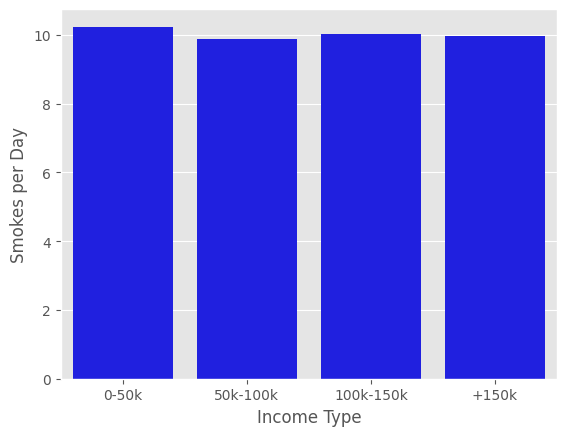

In [144]:
plt.xlabel('Income Type')
plt.ylabel('Smokes per Day')
sns.barplot(data = incometype_and_smoke, x = 'income_type', y = 'smokes_per_day', color = 'b')

In [145]:
incometype_and_drinks = df.groupby('income_type')['drinks_per_week'].mean().reset_index()

<Axes: xlabel='Income Type', ylabel='Drinks per Week'>

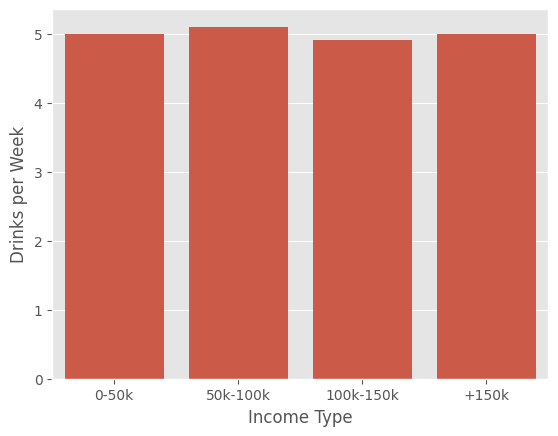

In [146]:
plt.xlabel('Income Type')
plt.ylabel('Drinks per Week')
sns.barplot(data = incometype_and_drinks, x = 'income_type', y = 'drinks_per_week')

An evident difference does not exist for drinking and smoking habits due to income.

- Gender

In [147]:
df['gender'].unique()

array(['Other', 'Male', 'Female'], dtype=object)

([<matplotlib.patches.Wedge at 0x79c08ad06250>,
 [Text(0.5258866118681461, 0.966148679788904, 'Other'),
  Text(-1.0999704432424267, -0.008063745597392041, 'Male'),
  Text(0.5329547460948623, -0.9622677582746713, 'Female')],
 [Text(0.28684724283717056, 0.5269901889757658, '34.13%'),
  Text(-0.5999838781322326, -0.004398406689486567, '31.97%'),
  Text(0.2907025887790157, -0.5248733226952752, '33.90%')])

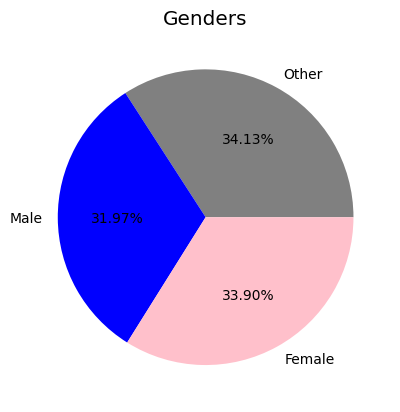

In [148]:
other = df['gender'].value_counts()['Other']
male = df['gender'].value_counts()['Male']
female = df['gender'].value_counts()['Female']

labels = ['Other', 'Male', 'Female']
values = [other, male, female]
colors = ['gray', 'blue', 'pink']
plt.title('Genders')

plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

- Marital Status & Attemps to Quit Smoke or Drinking

Firstly let's see the distribution of marital status

In [149]:
df['marital_status'].unique()

array(['Married', 'Single', 'In a relationship', 'Widowed', 'Divorced'],
      dtype=object)

In [150]:
married = df['marital_status'].value_counts()['Married']
single = df['marital_status'].value_counts()['Single']
in_a_relationship = df['marital_status'].value_counts()['In a relationship']
widowed = df['marital_status'].value_counts()['Widowed']
divorced = df['marital_status'].value_counts()['Divorced']

([<matplotlib.patches.Wedge at 0x79c08af7cf50>,
 [Text(0.8946343128972213, 0.6400230044200889, 'Married'),
  Text(-0.3388229653995254, 1.0465175574818955, 'Single'),
  Text(-1.09982569581475, 0.019581594051579467, 'In a relationship'),
  Text(-0.3344363198072662, -1.0479276444458234, 'Widowed'),
  Text(0.9084917261155012, -0.620195762303869, 'Divorced')],
 [Text(0.48798235248939337, 0.34910345695641204, '19.77%'),
  Text(-0.1848125265815593, 0.5708277586264884, '20.43%'),
  Text(-0.5999049249898637, 0.01068086948267971, '19.03%'),
  Text(-0.18241981080396336, -0.571596896970449, '21.70%'),
  Text(0.4955409415175461, -0.3382885976202921, '19.07%')])

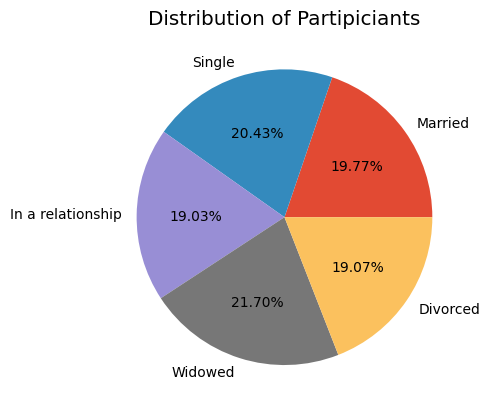

In [151]:
labels = ['Married', 'Single', 'In a relationship', 'Widowed', 'Divorced']
values = [married, single, in_a_relationship, widowed, divorced]

plt.title('Distribution of Partipiciants')
plt.pie(values, labels = labels, autopct = '%1.2f%%')

Let's make it more specific. Single & Has a Partner

([<matplotlib.patches.Wedge at 0x79c08af469d0>,
 [Text(-0.3791072608915766, 1.0326072267514335, 'Single'),
  Text(0.37910747426133684, -1.0326071484156936, 'Has a Partner')],
 [Text(-0.20678577866813266, 0.5632403055007817, '61.20%'),
  Text(0.20678589505163825, -0.5632402627721964, '38.80%')])

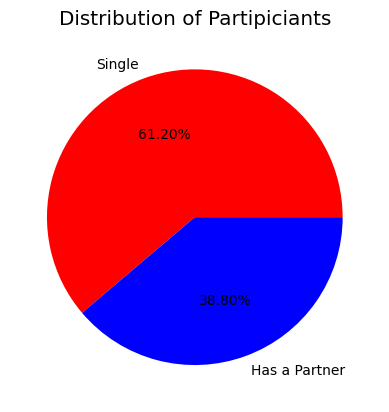

In [152]:
single = single + widowed + divorced
has_a_partner = in_a_relationship + married

labels = ['Single', 'Has a Partner']
values = [single, has_a_partner]
colors = ['red', 'blue']
plt.title('Distribution of Partipiciants')
plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

In [153]:
general_marital_statu = []
single = 0
non_single = 0

single_part = ['Single', 'Widowed', 'Divorced']
non_single_part = ['Married', 'In a relationship']
for i in df['marital_status']:
  if i in single_part:
    single += 1
    general_marital_statu.append('Single')
  else:
    general_marital_statu.append('Has a Partner')


df['general_marital_status'] = general_marital_statu

In [154]:
maritalstatu_and_quitsmoke = df.groupby('general_marital_status')['attempts_to_quit_smoking'].sum().reset_index()

<Axes: xlabel='Marital Statu', ylabel='Total Attemps to Quit Smoking'>

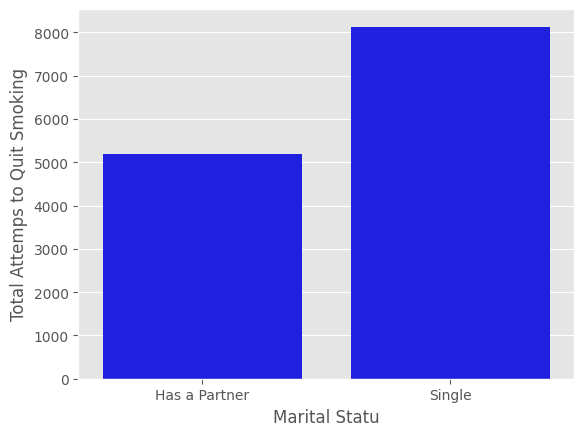

In [155]:
plt.xlabel('Marital Statu')
plt.ylabel('Total Attemps to Quit Smoking')
sns.barplot(data = maritalstatu_and_quitsmoke, x = 'general_marital_status', y = 'attempts_to_quit_smoking', color = 'b')

In [156]:
marritalstatu_and_quitdrink = df.groupby('general_marital_status')['attempts_to_quit_drinking'].sum().reset_index()

<Axes: xlabel='Marital Statu', ylabel='Total Atemps to Quit Drinking'>

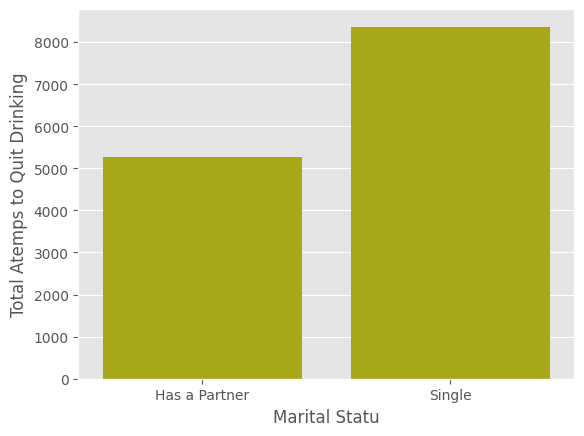

In [157]:
plt.ylabel('Total Atemps to Quit Drinking')
plt.xlabel('Marital Statu')
sns.barplot(data = marritalstatu_and_quitdrink, x = 'general_marital_status', y = 'attempts_to_quit_drinking', color = 'y')

Both statistics says that single people tried to quit a bad habit more than people who are in a relationship.

- Drinking & BMI

<Axes: xlabel='Drinks per Week', ylabel='BMI'>

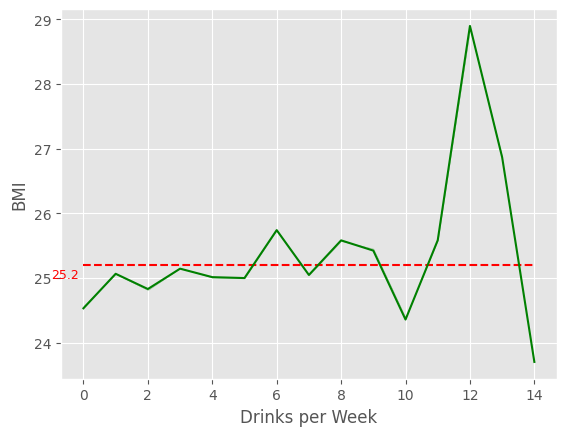

In [158]:
plt.ylabel('BMI')
plt.xlabel('Drinks per Week')
bmi_median = np.median(df['bmi'])
plt.text(-1, 25, bmi_median, fontsize = 9, color = 'red')
plt.hlines(y=bmi_median, xmin=df['drinks_per_week'].min(), xmax=df['drinks_per_week'].max(),
           colors='red', linestyles='dashed', linewidth=1.5)

sns.lineplot(data = df, x = 'drinks_per_week', y = 'bmi', color = 'g', ci = False)

People who drinks 12 times per week has the highest BMI. It can be outlier.

In [159]:
df[(df['bmi'] > 28) & (df['drinks_per_week'] == 12)]

,age,gender,education_level,employment_status,annual_income_usd,marital_status,children_count,smokes_per_day,drinks_per_week,age_started_smoking,...,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history,income_type,general_marital_status
1563,62,Female,Postgraduate,Student,57135,Widowed,5,5,12,28,...,True,Good,Never,Average,4.7,32.3,Strong,No,50k-100k,Single
2629,49,Female,High School,Self-Employed,175986,Divorced,5,11,12,25,...,False,Average,Daily,Average,6.8,38.4,No data,Current,+150k,Single
2762,31,Female,Secondary,Retired,89656,Widowed,0,14,12,26,...,False,Average,Weekly,Average,8.9,32.1,Weak,Current,50k-100k,Single


Only 3 people increases this average. That's why we can say that drinking alcohol does not have evident effect on BMI.

- Distributions of drinking and smoking due to genders

<Axes: xlabel='gender', ylabel='drinks_per_week'>

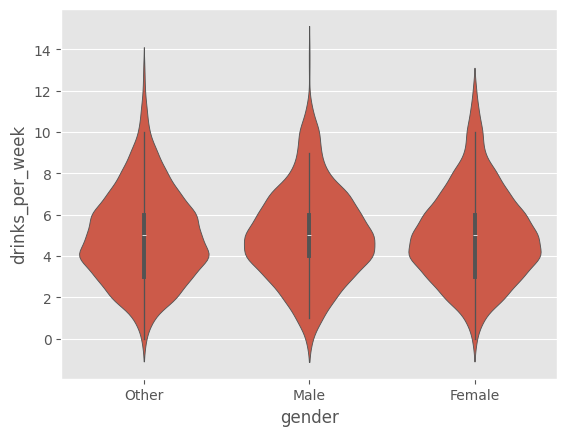

In [160]:
sns.violinplot(data = df, x = 'gender', y = 'drinks_per_week')

<Axes: xlabel='gender', ylabel='smokes_per_day'>

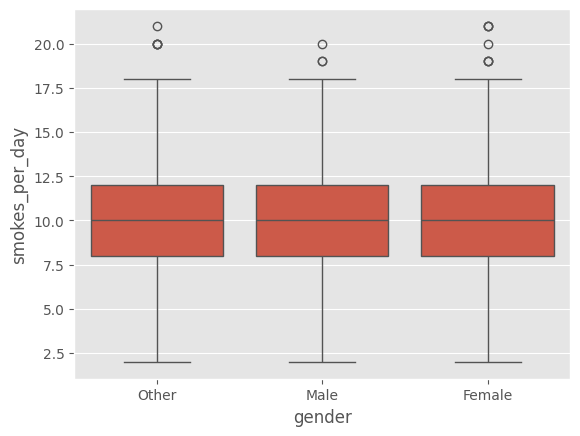

In [161]:
sns.boxplot(data = df, x = 'gender', y = 'smokes_per_day')

- Children Count & Smoker per Day

<Axes: xlabel='children_count', ylabel='smokes_per_day'>

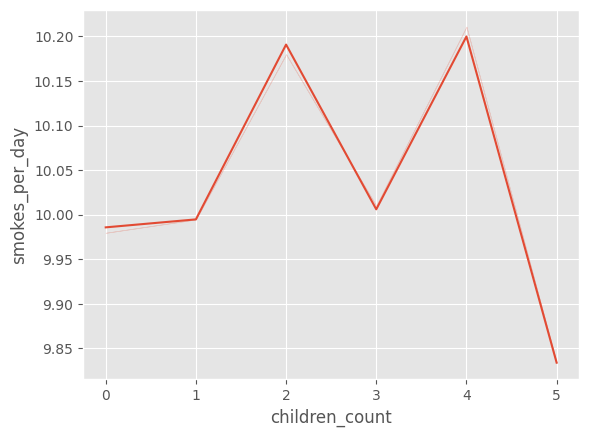

In [163]:
sns.lineplot(data = df, x = 'children_count', y = 'smokes_per_day', ci = False)

Statistics shows that people who has 5 children smokes less

- Employment Status & Drinking

In [164]:
df['employment_status'].unique()

array(['Student', 'Self-Employed', 'Unemployed', 'Employed', 'Retired'],
      dtype=object)

<Axes: xlabel='Employment Status', ylabel='Drinks per Week'>

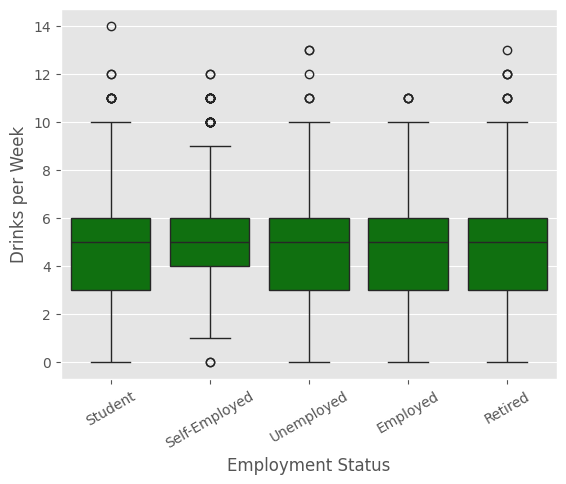

In [165]:
plt.ylabel('Drinks per Week')
plt.xlabel('Employment Status')
plt.xticks(rotation = 30)
sns.boxplot(data = df, x = 'employment_status', y = 'drinks_per_week', color = 'g')

Students are tend to drink alcohol more. It can be causes due to friends environment or trying new things.

Also retired people drinks so much too. It can be causes boredom and loneliness

- Sleep Hours & Mental Health

<Axes: xlabel='Mental Health', ylabel='Sleep Hours'>

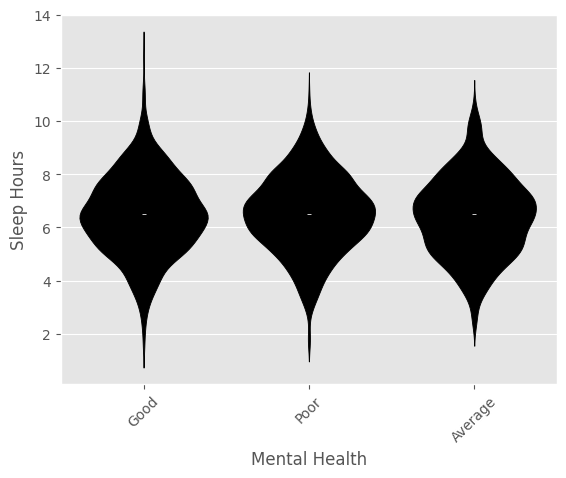

In [167]:
plt.xlabel('Mental Health')
plt.ylabel('Sleep Hours')
plt.xticks(rotation = 45)
sns.violinplot(data = df, x = 'mental_health_status', y = 'sleep_hours', color = 'black')

As expected, people who sleeps well have better mental health

- Mental Health & Income

<Axes: xlabel='Mental Health', ylabel='Exercise Frequency'>

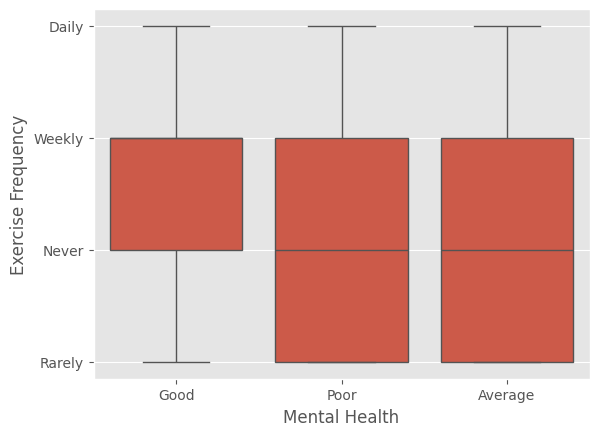

In [168]:
plt.xlabel('Mental Health')
plt.ylabel('Exercise Frequency')
sns.boxplot(data = df, x = 'mental_health_status', y = 'exercise_frequency')

Average exercise frequency of people who has good mental health is higher.